# 0.0. LIBRARY DOWNLOAD

In [220]:
pip install sklearn scikit-plot

Note: you may need to restart the kernel to use updated packages.


## 0.1. IMPORTS

In [265]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
import pandas as pd
import numpy as np

import inflection
import statistics
import math

from sklearn.linear_model import LogisticRegression

from sklearn import model_selection as ms
import scikitplot as skplt
from sklearn import ensemble as en
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image #adciona magem



## 0.2. Loading data

In [254]:
df_raw1 = pd.read_csv( '/home/arquinho/REPOS/graduation_projects/first_semester/titanic_faculdade/data/train.csv', )
df_raw2 = pd.read_csv( '/home/arquinho/REPOS/graduation_projects/first_semester/titanic_faculdade/data/test.csv' )
df_raw3 = pd.concat([df_raw1, df_raw2])


# 1.0. DATA DESCRIPTION

In [223]:
df1 = df_raw1.copy()

In [224]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1.1. Rename Columns

In [225]:
cols_old = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
            'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.2. Data Dimensions

In [226]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 891
Number of Cols: 12


## 1.3. Data Types

In [227]:
df1.dtypes

passenger_id      int64
survived          int64
pclass            int64
name             object
sex              object
age             float64
sib_sp            int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
dtype: object

## 1.4. Check NA

In [228]:
df1.isna().sum()

passenger_id      0
survived          0
pclass            0
name              0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              0
cabin           687
embarked          2
dtype: int64

In [229]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sib_sp        891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [230]:
statistics.mode(df1['age'])
df1['age'].isna().sum()

177

## 1.5. Fillout NA

In [231]:
#sex        
df1['sex'] = df1.apply( lambda x: 0 if x['sex'] == 'male' else 1 if x['sex'] == 'female' else x, axis=1 )

#age 
df1['age'] = df1['age'].fillna(statistics.mode(df1['age']))
# df1['age'] = df1['age'].apply( lambda x: 0 if df1['age']<1 else 24 if math.isnan(df1['age']) else df1, axis=1 )

#embarked
df1['embarked'] = df1.apply( lambda x: 1 if x['embarked'] == 'S'  else 2 if x['embarked'] == 'C' else 3 if x['embarked'] == 'Q' else 1, axis=1 )

# drop not usuful columns
dropa = ['cabin', 'ticket', 'name', 'passenger_id']
df1.drop(dropa, axis=1, inplace=True )


## 1.6. Change Data Types

In [232]:
# age
df1['age'] = np.int64( df1['age'])

# fare
df1['fare'] = np.int64( df1['fare'] )


In [233]:
df1['age'].unique()

array([22, 38, 26, 35, 24, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17,
       32, 16, 25,  0, 30, 33, 23, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [234]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  891 non-null    int64
 1   pclass    891 non-null    int64
 2   sex       891 non-null    int64
 3   age       891 non-null    int64
 4   sib_sp    891 non-null    int64
 5   parch     891 non-null    int64
 6   fare      891 non-null    int64
 7   embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


## 1.7. Descriptive Statistics

In [235]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] ) #todas as variaveis numericas
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] ) #eclui todas as variaves numericas e data

### 1.7.1. Numerical Atributes

In [236]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T # mede a assimitria dis dasdos. Para a direita positiva e esquerda negativa
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T # mede a distribuiçao dos dados. calda curta (leptocurtica) mais fechada que a 
#distribuiçao normal. Calda longa (platicurtica) mais aberta que a distribuiçao bnormal. Quanto mais proxima de 0 o aor mais Normal é

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,survived,0.0,1.0,1.0,0.383838,0.0,0.486319,0.478523,-1.775005
1,pclass,1.0,3.0,2.0,2.308642,3.0,0.835602,-0.630548,-1.280015
2,sex,0.0,1.0,1.0,0.352413,0.0,0.477722,0.618921,-1.620580
3,age,0.0,80.0,80.0,28.551066,24.0,13.199600,0.651509,0.926658
4,sib_sp,0.0,8.0,8.0,0.523008,0.0,1.102124,3.695352,17.880420
5,parch,0.0,6.0,6.0,0.381594,0.0,0.805605,2.749117,9.778125
6,fare,0.0,512.0,512.0,31.785634,14.0,49.675830,4.786430,33.398037
7,embarked,1.0,3.0,2.0,1.361392,1.0,0.635317,1.543397,1.105629


### 1.7.2. Categorical Atributes

In [237]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

Series([], dtype: float64)

In [238]:
df2 = df1.copy()

# 7.0. MACHINE LEARNING MODELLING

In [239]:
X = df2.drop('survived', axis=1 )

y = df2['survived'].copy()

In [240]:
x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.20)

Train Performance:  0.8103932584269663
Test Performance:  0.776536312849162


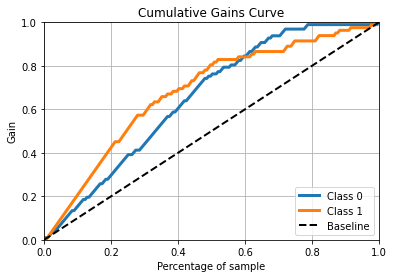

In [241]:
# criar um modelo de Regressão Logística

lr_model = LogisticRegression(solver='liblinear')

#model fit
lr_model.fit(x_train, y_train)

# model predict
yhat_lr = lr_model.predict_proba( x_test )

# accumulative gain
print('Train Performance: ', lr_model.score(x_train, y_train))
print('Test Performance: ', lr_model.score(x_test, y_test))
skplt.metrics.plot_cumulative_gain( y_test, yhat_lr);

Train Performance:  0.8286516853932584
Test Performance:  0.8044692737430168


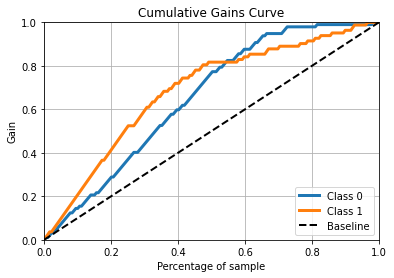

In [242]:
# criar um modelo de Regressão Logística

dt_model = DecisionTreeClassifier(max_depth=3)

#model fit
dt_model.fit(x_train, y_train)

# model predict
yhat_dt = dt_model.predict_proba( x_test )

# accumulative gain
print('Train Performance: ', dt_model.score(x_train, y_train))
print('Test Performance: ', dt_model.score(x_test, y_test))
skplt.metrics.plot_cumulative_gain( y_test, yhat_dt);

Train Performance:  0.9705056179775281
Test Performance:  0.7486033519553073


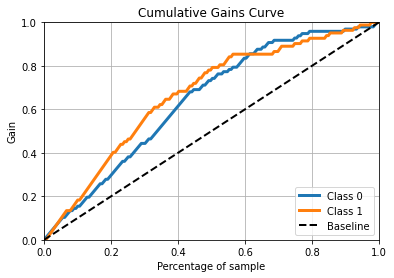

In [243]:
# criar um modelo de Regressão Logística

et_model = en.ExtraTreesClassifier( n_estimators=400, n_jobs=-1, random_state=42 )

#model fit
et_model.fit( x_train, y_train )

# model predict
yhat_et = et_model.predict_proba( x_test )

# accumulative gain
print('Train Performance: ', et_model.score(x_train, y_train))
print('Test Performance: ', et_model.score(x_test, y_test))
skplt.metrics.plot_cumulative_gain( y_test, yhat_et);

# 2.0 DF TEST SUBMISSION

In [256]:
df1 = df_raw2.copy()

In [257]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [258]:
cols_old = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
            'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

#sex        
df1['sex'] = df1.apply( lambda x: 0 if x['sex'] == 'male' else 1 if x['sex'] == 'female' else x, axis=1 )

#age 
df1['age'] = df1['age'].fillna(statistics.mode(df1['age']))
# df1['age'] = df1['age'].apply( lambda x: 0 if df1['age']<1 else 24 if math.isnan(df1['age']) else df1, axis=1 )

#embarked
df1['embarked'] = df1.apply( lambda x: 1 if x['embarked'] == 'S'  else 2 if x['embarked'] == 'C' else 3 if x['embarked'] == 'Q' else 1, axis=1 )

# drop not usuful columns
dropa = ['cabin', 'ticket', 'name', 'passenger_id']
df1.drop(dropa, axis=1, inplace=True )

# age
df1['age'] = np.int64( df1['age'])

# fare
df1['fare'] = np.int64( df1['fare'] )

In [261]:
dt_predict = dt_model.predict(df1)

In [262]:
dt_sub=pd.Series(dt_predict, index=df_raw2['PassengerId'], name='survived')

In [263]:
dt_sub.to_csv('/home/arquinho/REPOS/graduation_projects/first_semester/titanic_faculdade/data/dt_sub.csv', header=True)

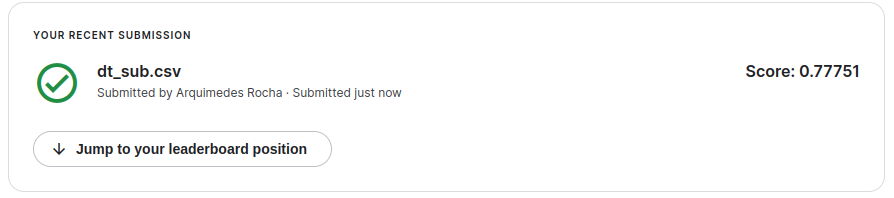

In [266]:
Image( '/home/arquinho/REPOS/graduation_projects/first_semester/titanic_faculdade/submissao.png' )